In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import seaborn as sns

# **Data Preparation and Preprocessing**

In [2]:
#import csv and remove whitespace using strip()
df = pd.read_csv('supply_chain_data.csv',skipinitialspace = True,delimiter=',')
df.columns = df.columns.str.strip()
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [4]:
df.isnull().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

Observation:
1. Data contains 23 columns with 100 row.
2. No column has missing value.
3. All column data types is appropriate.

# **Correlation Analysis**

<Axes: >

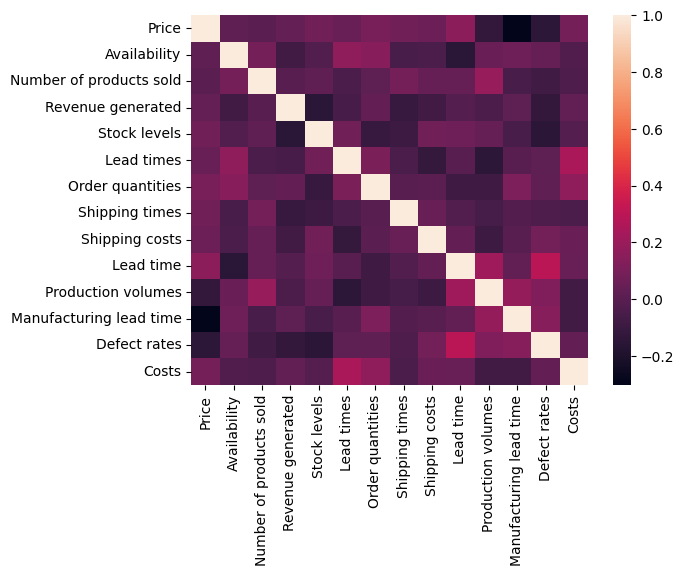

In [5]:
#Group colum that has numerical value
numeric = df[['Price', 'Availability','Number of products sold','Revenue generated','Stock levels','Lead times',
            'Order quantities','Shipping times','Shipping costs','Lead time','Production volumes',
            'Manufacturing lead time','Defect rates','Costs']]
cormat = numeric.corr() #Calculate correaltion
sns.heatmap(cormat)

<Axes: >

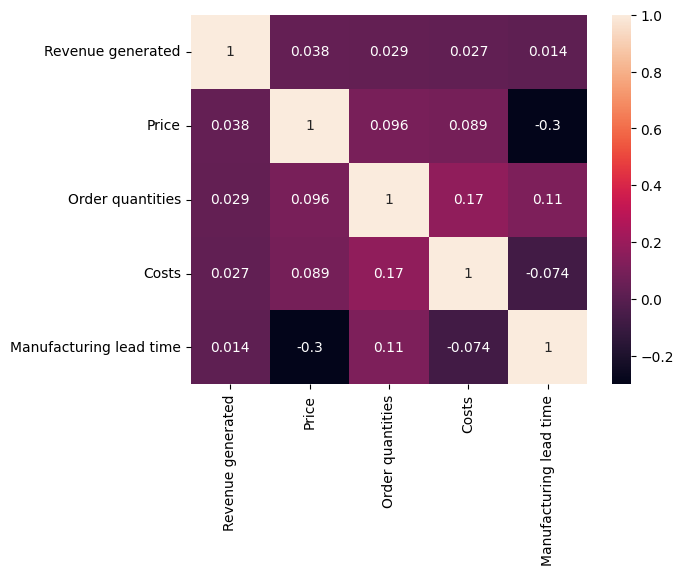

In [6]:
cols = cormat.nlargest(5, 'Revenue generated').index #get top 5 index that has largest correlation
cm = np.corrcoef(numeric[cols].values.T) 
sns.heatmap(cm, annot=True, xticklabels=cols, yticklabels=cols)

Observation:
1. Price with manufacturing lead time indicate weak negative linear relationship with -0,3 value.
2. Order quantities with costs indicate weak linear positive linear realationship with 0,17 value.
3. Other than that realationship with other columns have low significance.

# **Sales and Revenue Analysis**

In [7]:
fig = px.scatter(df, x='Price', 
                 y='Revenue generated', 
                 color='Product type', 
                 trendline="ols")
fig.show()

Observation:
1. The higher the price of skincare product the more revenue generated.
2. The lower the price of cosmetics and haircare products the less revenue generated.

<function matplotlib.pyplot.show(close=None, block=None)>

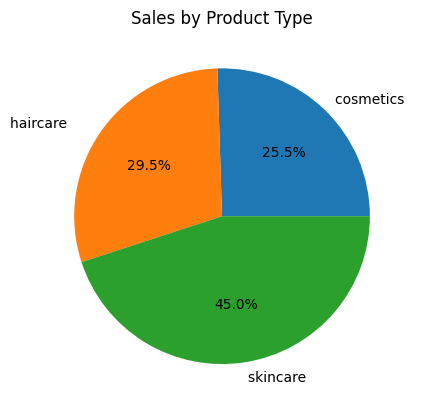

In [8]:
#Group by product type with number of products sold
type_sales = df.groupby('Product type')['Number of products sold'].sum().reset_index()

#pie chart
plt.pie(type_sales['Number of products sold'], labels = type_sales['Product type'], autopct='%1.1f%%')
plt.title('Sales by Product Type')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

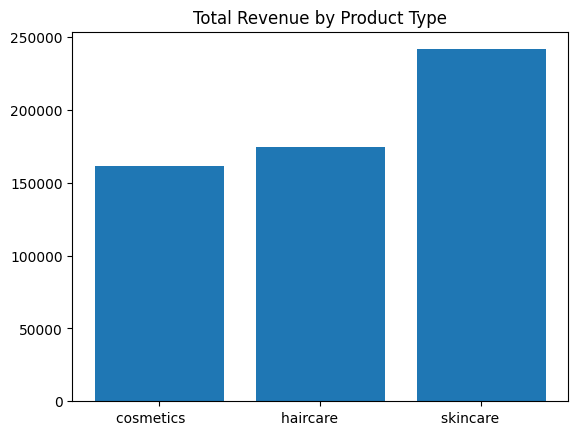

In [9]:
type_revenue = df.groupby('Product type')['Revenue generated'].sum().reset_index()

plt.bar(type_revenue['Product type'], type_revenue['Revenue generated'])
plt.title('Total Revenue by Product Type')
plt.show

## **Cost Analysis**

In [23]:
ship_count = df.groupby('Shipping carriers')['Shipping times'].sum().reset_index()
ship_cost = df.groupby('Shipping carriers')['Shipping costs'].sum().reset_index()
print(pd.merge(ship_count, ship_cost))

    Shipping carriers  Shipping times  Shipping costs
0  Carrier A                      172      155.537831
1  Carrier B                      228      236.897620
2  Carrier C                      175      162.379457


## **Analyzing Defect Rate**

<function matplotlib.pyplot.show(close=None, block=None)>

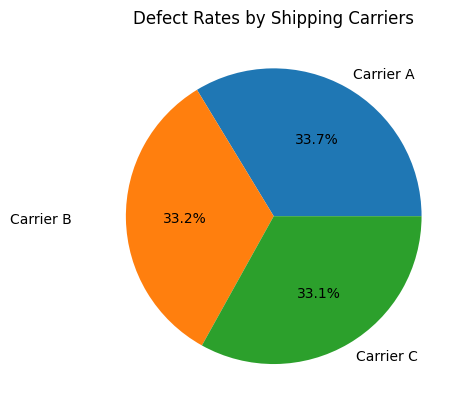

In [ ]:
supplier_defect = df.groupby('Shipping carriers')['Defect rates'].sum().reset_index()

plt.pie(supplier_defect['Defect rates'], labels = supplier_defect['Shipping carriers'], autopct='%1.1f%%')
plt.title('Defect Rates by Shipping Carriers')
plt.show

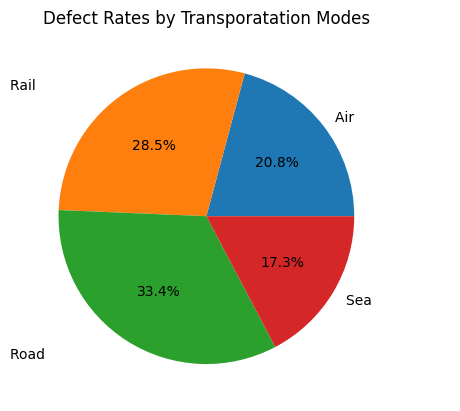

In [ ]:
transport_defect = df.groupby('Transportation modes')['Defect rates'].sum().reset_index()

plt.pie(transport_defect['Defect rates'], labels=transport_defect['Transportation modes'], autopct='%1.1f%%')
plt.title('Defect Rates by Transporatation Modes')
plt.show()

Observation:
1. Defect rates for different shipping carriers relatively same, so defect rates doesn't effect by type of shipping carriers.
2. Defect rates by transportation modes lead by road modes. This means item with road modes more likely to broke.